Import Data

In [23]:
import pandas as pd
import numpy as np
import os

# Load data
# Path to the dataset subfolder
data_path = './dataset'

# List all files in the subfolder
# file_paths = [os.path.join(data_path, file) for file in os.listdir(data_path) if file.endswith('.csv.gz')]
file_path = './dataset\\cityA_groundtruthdata.csv.gz'
city_name = os.path.basename(file_path).split('_')[0]

# chunk_size = 50000
# pd.read_csv(file_path, compression='gzip',chunksize=chunk_size)
data = pd.read_csv(file_path, compression='gzip', nrows=50000)

In [24]:
def create_sequences(data, seq_length=3):
    sequences = []
    labels = []
    for uid, group in data.groupby('uid'):
        coords = group[['x', 'y']].values
        for i in range(len(coords) - seq_length):
            sequences.append(coords[i:i + seq_length])  # Input sequence
            labels.append(coords[i + seq_length])  # Target value
    return np.array(sequences), np.array(labels)


In [25]:
# Generate sequences and labels
X, y = create_sequences(data)

# Display the shape of the prepared data
print(f"Shape of input sequences (X): {X.shape}")
print(f"Shape of labels (y): {y.shape}")

Shape of input sequences (X): (49898, 3, 2)
Shape of labels (y): (49898, 2)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define LSTM model architecture
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(2)  # Output layer with 2 units for predicting (x, y)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)

# Save the model for future use
model.save('trajectory_predictor.h5')

print("Model training complete!")

c:\Users\shi_h\anaconda3\envs\louvain\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1003.3331 - val_loss: 246.4832
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 61.8304 - val_loss: 238.1349
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 59.8036 - val_loss: 256.9130
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 57.1543 - val_loss: 240.8479
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55.4241 - val_loss: 240.1681
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 57.0652 - val_loss: 246.3107
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55.8980 - val_loss: 246.3187
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56.3406 - val_loss: 244.3507
Epoch 9/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 56.1313 - val_loss: 250.1871
Epoch 10/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 55.2280 - val_loss: 254.2067


Model training complete!


Evaluate Predictions

1560/1560 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


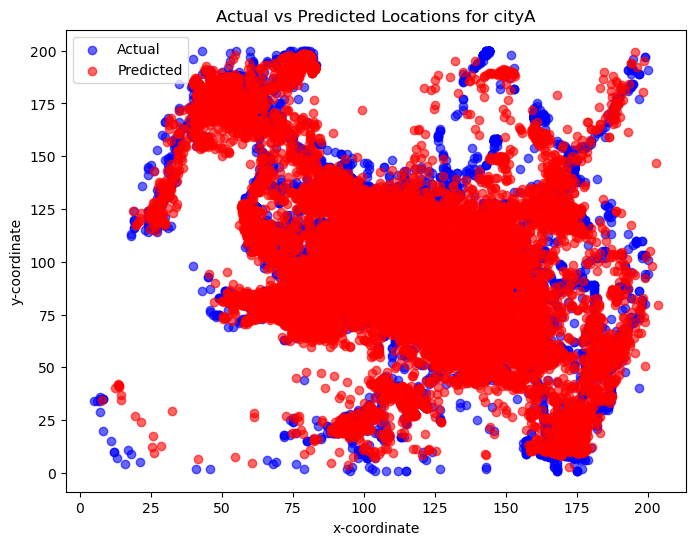

In [29]:
import matplotlib.pyplot as plt
    
# Predict on the entire dataset for simplicity
predictions = model.predict(X)

# Visualize the predictions
plt.figure(figsize=(8, 6))
plt.scatter(y[:, 0], y[:, 1], color='blue', label='Actual', alpha=0.6)
plt.scatter(predictions[:, 0], predictions[:, 1], color='red', label='Predicted', alpha=0.6)
plt.title(f"Actual vs Predicted Locations for {city_name}")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.legend()
plt.show()
